# Bootstrapping and resampling

In [116]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.stats import ttest_ind
from scipy.stats import norm
sns.set()

## Permutation test

1. combine results from different groups in single data set.
2. shuffle combined data, randomly draw (without replacing) a resample of same size as group A 
3. From remaining data, randomly draw (without replacing) a resample of same size as groub B 
4. calculate statistic for resamples
5. repeat previous steps


In [105]:
sample_a = np.random.normal(0, 1, 20)
sample_b = np.random.normal(0.2, 1, 30)
sample_mean_diff= np.mean(sample_a) - np.mean(sample_b)
print("mean difference: {}".format(sample_mean_diff))
ttest_ind(sample_a, sample_b)

mean difference: -0.42155447194141077


Ttest_indResult(statistic=-1.3848768419600213, pvalue=0.1724935970038468)

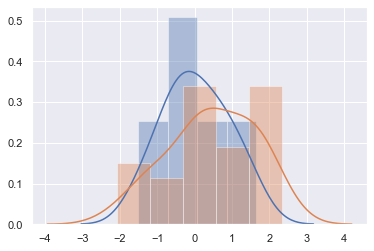

In [106]:
sns.distplot(sample_a)
sns.distplot(sample_b)

p-value: 0.1705


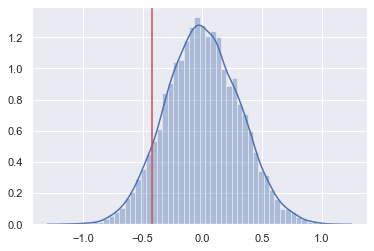

In [107]:
diffs = np.array([])
iterations = 10000
sample = np.concatenate((sample_a, sample_b), axis=None)
for i in range(iterations):
    permutation = np.random.permutation(sample)
    mean_a = np.mean(permutation[:len(sample_a)])
    mean_b = np.mean(permutation[len(sample_a):])
    diffs = np.append(diffs, mean_a - mean_b)
sns.distplot(diffs)
p_value = np.sum((np.abs(diffs)>np.abs(sample_mean_diff)))/diffs.shape[0]
plt.axvline(sample_mean_diff, color='r')
print("p-value: {}".format(p_value))

### Bootstrapping
resample *with* replacement

In [112]:
size = 30
sample= np.random.normal(0, 1, size)

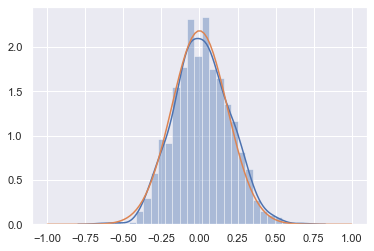

In [119]:
iterations = 1000
means = np.array([])
for i in range(iterations):
    mean = np.mean(np.random.choice(sample, replace=True, size=size))
    means = np.append(means, mean)
sns.distplot(means)
x = np.linspace(-1, 1, 100)
plt.plot(x, norm.pdf(x, 0, 1/np.sqrt(size)))